In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bedeutung der Spalten
DR_NO: Fallnummer der Polizei.

Date Rptd: Datum, an dem der Vorfall gemeldet wurde.

DATE OCC: Datum, an dem der Vorfall tatsächlich stattgefunden hat.

TIME OCC: Uhrzeit des Vorfalls.

AREA: Code des geografischen Gebiets.

AREA NAME: Name des geografischen Gebiets.

Rpt Dist No: Berichtsdistrikt-Nummer.

Part 1-2: Klassifizierung des Verbrechens (Teil 1 oder 2).

Crm Cd: Verbrechenscode.

Crm Cd Desc: Beschreibung des Verbrechens.

Mocodes: Modus Operandi-Codes (Tatmuster).

Vict Age: Alter des Opfers.

Vict Sex: Geschlecht des Opfers.

Vict Descent: Herkunft/Abstammung des Opfers.

Premis Cd: Code des Tatorts.

Premis Desc: Beschreibung des Tatorts.

Weapon Used Cd: Waffencode.

Weapon Desc: Beschreibung der verwendeten Waffe.

Status: Status des Falls.

Status Desc: Beschreibung des Status (z.B. "Adult Arrest", "Invest Cont").

Crm Cd 1–4: Weitere Verbrechenscodes, falls vorhanden.

LOCATION: Adresse des Vorfalls.

Cross Street: Nächste Kreuzstraße.

LAT: Breitengrad (Länge).

LON: Längengrad (Longitude).

In [ ]:
# Quelle Dataset
# https://www.kaggle.com/datasets/haseefalam/crime-dataset
df = pd.read_csv("LA_Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
# Kopie des Dataframes erstellen
df_crimes = df.copy()
# Umwandlung der Spalte DATE OCC in Datetime Format
df_crimes["DATE OCC"] = pd.to_datetime(df_crimes["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")
# Jahr und Monat aus Spalte DATE OCC extrahiert
df_crimes["YEAR OCC"] = df_crimes["DATE OCC"].dt.year
df_crimes["MONTH OCC"] = df_crimes["DATE OCC"].dt.month
# Beide Spalten in eine Spalte zusammengefasst verbunden über "-"
# zfill(2) setzt voranstehende Nullen bis die gewollte Länge der Monate von 2 erreicht ist
df_crimes["YEAR-MONTH OCC"] = df_crimes["YEAR OCC"].astype(str) + "-" + df_crimes["MONTH OCC"].astype(str).str.zfill(2)
# Erstellt neuen Dataframe "df_crimes_per_month wobei nach "MONTH OCC" gruppiert wird und dann die Anzahl berechnet wird
df_crimes = df_crimes.groupby(["YEAR-MONTH OCC"]).size().reset_index(name="CRIME COUNT")
# Zeigt die Summe der Straftaten aus den Jahren 2020-2024 pro Monat an
df_crimes.head()

,YEAR-MONTH OCC,CRIME COUNT
0,2020-01,18546
1,2020-02,17274
2,2020-03,16183
3,2020-04,15699
4,2020-05,17224


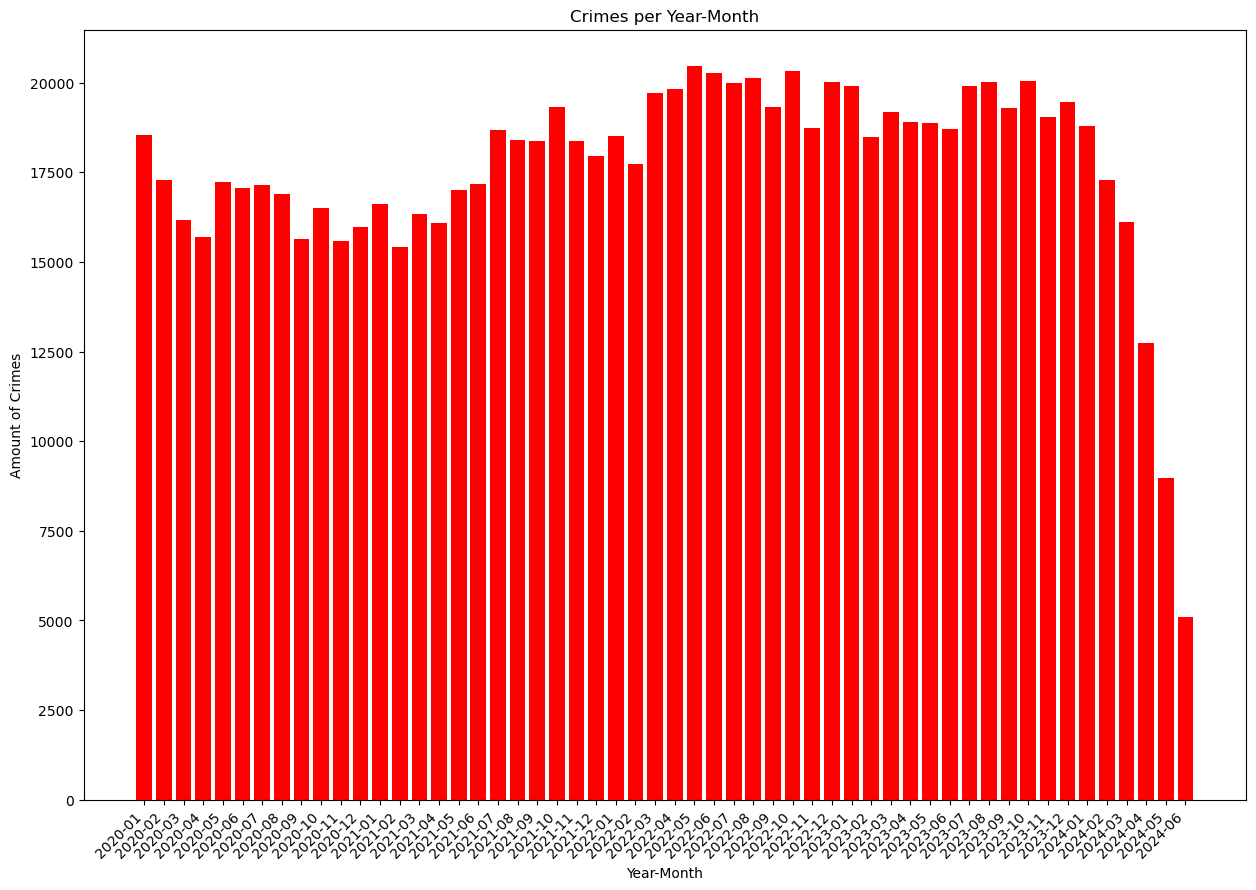

In [4]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45, ha='right')
# Erstellt ein Balkendiagramm mit den Jahren auf der x-Achse und der Anzahl der Verbrechen pro Jahr auf der y-Achse
plt.bar(df_crimes["YEAR-MONTH OCC"], df_crimes["CRIME COUNT"], color= "red")

# Beschriftung der Achsen und setzen eines Titels des Diagramms
plt.xlabel("Year-Month")
plt.ylabel("Amount of Crimes")
plt.title("Crimes per Year-Month")
plt.show()

In [5]:
df_area_crime_counts = df.copy()
df_area_crime_counts = df_area_crime_counts.groupby("AREA NAME").size().reset_index(name="CRIME COUNT").sort_values(by="CRIME COUNT", ascending=False)
df_area_crime_counts

,AREA NAME,CRIME COUNT
1,Central,64737
0,77th Street,59719
12,Pacific,55792
15,Southwest,54129
6,Hollywood,50035
8,N Hollywood,48556
14,Southeast,48127
11,Olympic,47840
9,Newton,47125
20,Wilshire,45734


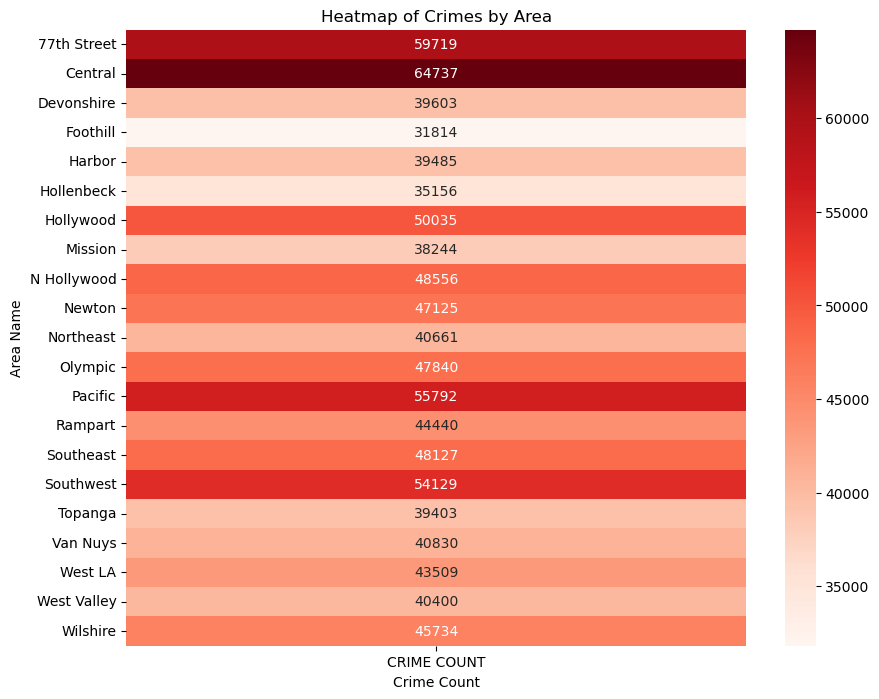

In [6]:
# Erstellen einer Pivot-Tabelle für das Heatmap-Diagramm
pivot_table = df_area_crime_counts.pivot_table(index="AREA NAME", values="CRIME COUNT")
# Erstellen einer neuen Abbildung mit den angegebenen Abmessungen
plt.figure(figsize=(10, 8))
# Zeichnen der Heatmap mit den Daten aus der Pivot-Tabelle
sns.heatmap(pivot_table, annot=True, cmap="Reds", fmt=".0f")
# Hinzufügen eines Titels zur Heatmap
plt.title("Heatmap of Crimes by Area")
# Beschriftung der x-Achse
plt.xlabel("Crime Count")
# Beschriftung der y-Achse
plt.ylabel("Area Name")
# Anzeigen der Heatmap
plt.show()

Welche Verbrechen wurden mehr

Welche Personen Gruppen sind besonders betroffen von Verbrechen